In [1]:
# This notebook used to debug new arcitecture, sanity check of 
# new architecture (overfit on small dataset), find learning rates
# and other hyperparams. Plot and visualy check augmentation.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys; sys.path.append("../")
from include import *
import utils
from model import data_loader, net, metric
torch.cuda.empty_cache() # release gpu memory

In [3]:
params = {
    'batch_size': 128,
    'num_workers': 8,
    'cuda': torch.cuda.is_available(),
    'save_summary_steps': 1}

class ParamsDict(): 
    def __init__(self, dict_): self.__dict__.update(dict_)       
        
params = ParamsDict(params)
data_dir = "/home/denys/DataScienc/projects/owoschi/data/imagenet/"
dls = data_loader.fetch_dataloader(["train", "valid"], data_dir, params)

# Model

In [8]:
# model = net.resnet18(pretrained=True).to(device)
model = net.resnet34(pretrained=True).to(device)

for layer in model.parameters(): layer.requires_grad = False
for i in model.fc.parameters(): i.requires_grad = True

In [9]:
lr = 0.01
epochs = 2

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = utils.OneCycle(epochs, optimizer, div_factor=25, pct_start=0.3, dl_len=len(dls["train"]))

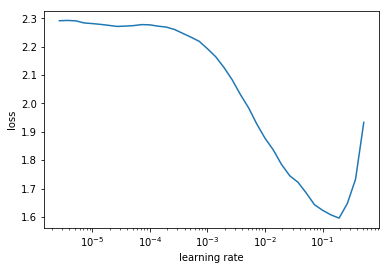

In [7]:
log_lrs, losses = find_lr(model, dls['train'], optimizer, loss_function, beta=0.95)
plot_lr_find(log_lrs, losses)

# Train

In [28]:
history = trainer(model, optimizer, scheduler, loss_function, epochs, dls['train'], dls['valid'], save_best=False)

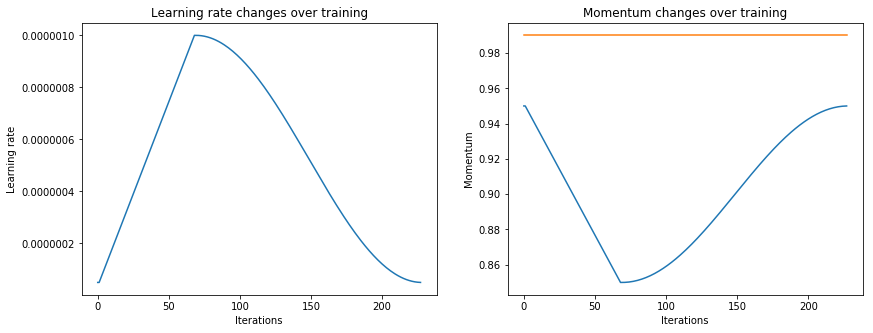

In [114]:
utils.show_lr_and_moms(history)

In [19]:
model_dir = '/home/denys/DataScienc/projects/owoschi/experiment/base_model'
train_and_evaluate(model, dls['train'], dls['valid'], optimizer, loss_function, metrics, params, model_dir,
                    restore_file=None)


Checkpoint Directory exists! 



Checkpoint Directory exists! 


# Show Results

Figure save to /home/denys/DataScienc/projects/owoschi/experiments/history_plots.png


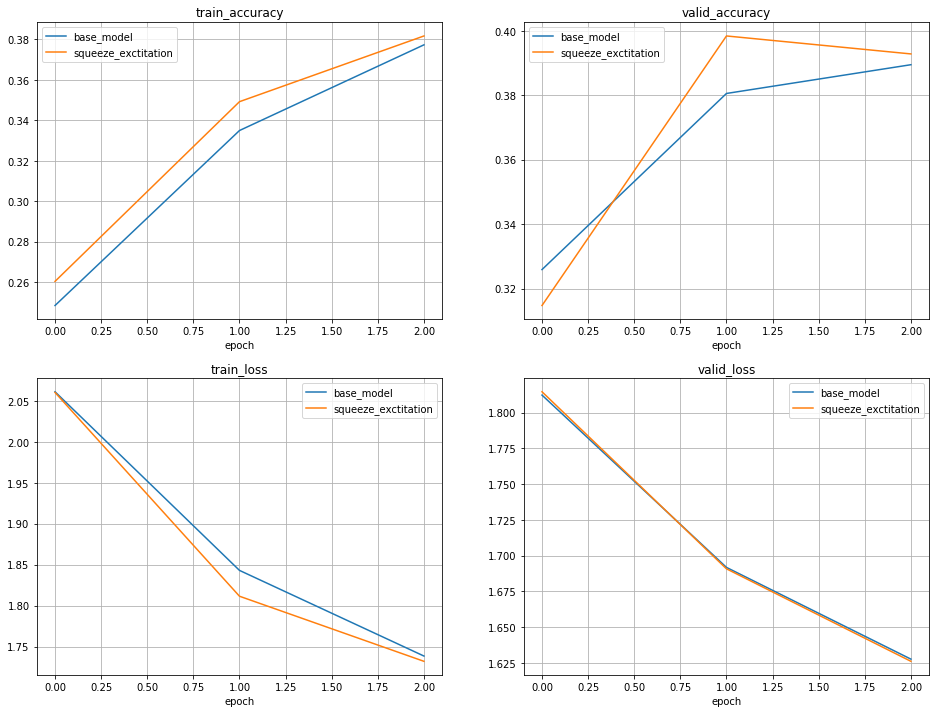

In [382]:
path = "/home/denys/DataScienc/projects/owoschi/experiments"
plotter = Plotter(path)
plotter.plot_history_dicts()